In [14]:
# Imports
import pickle

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('../data/all_drinks.csv', index_col=[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 40 columns):
strDrink           546 non-null object
dateModified       545 non-null object
idDrink            546 non-null int64
strAlcoholic       545 non-null object
strCategory        546 non-null object
strDrinkThumb      546 non-null object
strGlass           546 non-null object
strIBA             71 non-null object
strIngredient1     546 non-null object
strIngredient10    3 non-null object
strIngredient11    3 non-null object
strIngredient12    1 non-null object
strIngredient13    0 non-null float64
strIngredient14    0 non-null float64
strIngredient15    0 non-null float64
strIngredient2     546 non-null object
strIngredient3     461 non-null object
strIngredient4     294 non-null object
strIngredient5     166 non-null object
strIngredient6     78 non-null object
strIngredient7     25 non-null object
strIngredient8     15 non-null object
strIngredient9     6 non-null object
strInstruction

In [16]:
df.head()

,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,strIngredient10,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,'57 Chevy with a White License Plate,2016-07-18 22:49:04,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,NaN,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1-900-FUK-MEUP,2016-07-18 22:27:04,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,NaN,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,110 in the shade,2016-02-03 14:51:57,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,NaN,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,151 Florida Bushwacker,2016-07-18 22:28:43,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,NaN,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,155 Belmont,2016-10-05 12:36:28,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,NaN,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN


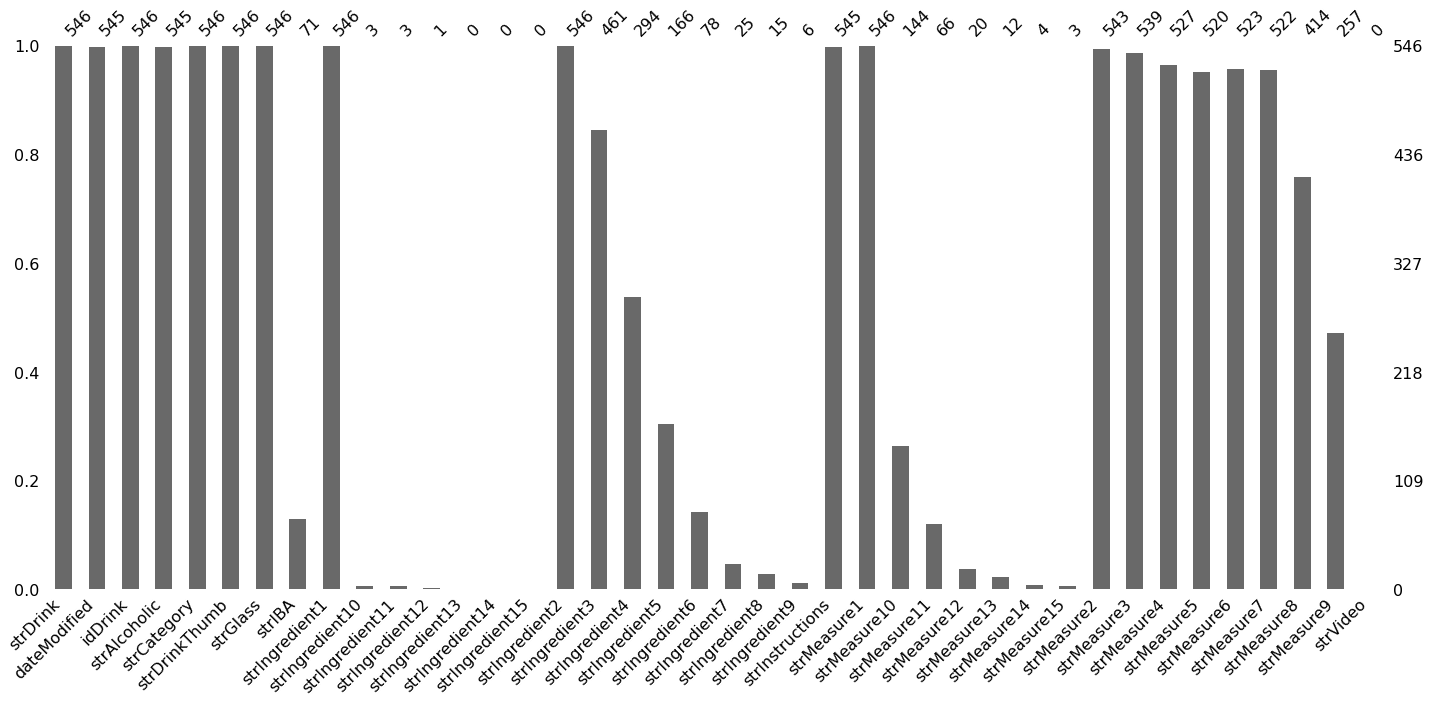

In [17]:
# Check for missing data
msno.bar(df, labels=True);

## Check categorical variables

In [18]:
df['strAlcoholic'].value_counts()

Alcoholic           478
Non alcoholic        57
Optional alcohol      9
Non Alcoholic         1
Name: strAlcoholic, dtype: int64

In [19]:
df['strGlass'].value_counts()

Cocktail glass              122
Highball glass               83
Collins Glass                61
Old-fashioned glass          51
Shot glass                   35
Collins glass                32
Highball Glass               23
Coffee mug                   18
Whiskey sour glass           17
Champagne flute              11
Punch bowl                   10
Hurricane glass               7
Pint glass                    7
Beer mug                      6
Irish coffee cup              6
Pitcher                       5
Beer pilsner                  5
Coffee Mug                    5
Margarita/Coupette glass      4
Wine Glass                    4
Old-Fashioned glass           4
White wine glass              4
Martini Glass                 3
Cocktail Glass                3
Brandy snifter                3
Mason jar                     2
Pousse cafe glass             2
Shot Glass                    2
Beer Glass                    2
Champagne Flute               2
Punch Bowl                    2
Margarit

In [20]:
# Convert two columns to strings and lowercase to merge like values
df['strAlcoholic'] = df['strAlcoholic'].astype(str)
df['strAlcoholic'] = df['strAlcoholic'].apply(lambda x: x.lower())    
df['strGlass'] = df['strGlass'].astype(str)
df['strGlass'] = df['strGlass'].apply(lambda x: x.lower())

In [21]:
# Get top 10 glass types
glass_types = df['strGlass'].value_counts(sort=True, ascending=True)
top_10 = glass_types[-10:]

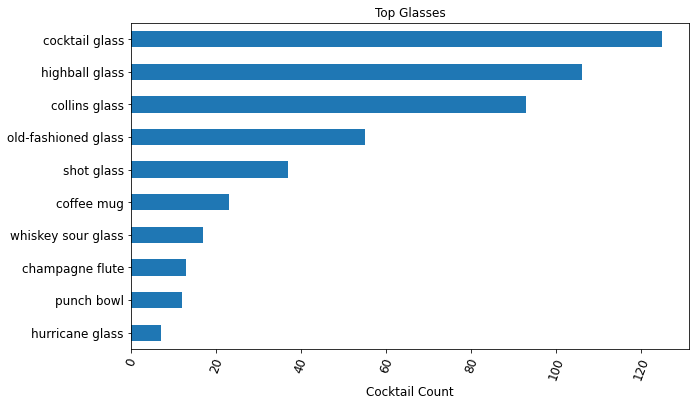

In [22]:
# Plot top 10 glass types
fig, ax = plt.subplots(figsize=(10, 6))

ax = top_10.plot(kind='barh', title ="Top Glasses", fontsize=12)
ax.set_xlabel("Cocktail Count", fontsize=12)
ax.patch.set_facecolor('None')
ax.grid(False)
plt.xticks(rotation=70)
plt.show()

In [23]:
pickle.dump(df, open('../data/dataframe.p', 'wb'))

## Create table of ingredients

In [24]:
cols = ['idDrink']
str_cols = [f'strIngredient{i}' for i in range(1, 16)]
cols.extend(str_cols)

In [25]:
ing_df = df[cols]
print(ing_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 16 columns):
idDrink            546 non-null int64
strIngredient1     546 non-null object
strIngredient2     546 non-null object
strIngredient3     461 non-null object
strIngredient4     294 non-null object
strIngredient5     166 non-null object
strIngredient6     78 non-null object
strIngredient7     25 non-null object
strIngredient8     15 non-null object
strIngredient9     6 non-null object
strIngredient10    3 non-null object
strIngredient11    3 non-null object
strIngredient12    1 non-null object
strIngredient13    0 non-null float64
strIngredient14    0 non-null float64
strIngredient15    0 non-null float64
dtypes: float64(3), int64(1), object(12)
memory usage: 72.5+ KB
None


In [26]:
ing_df.head()

,idDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15
0,14029,Creme de Cacao,Vodka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15395,Absolut Kurant,Grand Marnier,Chambord raspberry liqueur,Midori melon liqueur,Malibu rum,Amaretto,Cranberry juice,Pineapple juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15423,Lager,Tequila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14588,Malibu rum,Light rum,151 proof rum,Dark Creme de Cacao,Cointreau,Milk,Coconut liqueur,Vanilla ice-cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15346,Dark rum,Light rum,Vodka,Orange juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def ing_rows(row):
    "Create new columns for ingredients and remove NaNs"
    ing_vals = row[1:].values
    ing_vals = [val.lower() for val in ing_vals if isinstance(val, str)]

    for val in ing_vals:
        row[val] = 1 
        
    return row

In [28]:
new_ing_df = ing_df.apply(ing_rows, axis=1)
new_ing_df.head()

,151 proof rum,7-up,absinthe,absolut citron,absolut kurant,absolut peppar,absolut vodka,advocaat,agave syrup,ale,...,white creme de menthe,white rum,wild turkey,wine,worcestershire sauce,wormwood,yellow chartreuse,yoghurt,yukon jack,zima
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Remove old ingredient columns and set index
new_ing_df.drop(str_cols, axis=1, inplace=True)
new_ing_df.set_index('idDrink', inplace=True)
new_ing_df.head()

,151 proof rum,7-up,absinthe,absolut citron,absolut kurant,absolut peppar,absolut vodka,advocaat,agave syrup,ale,...,white creme de menthe,white rum,wild turkey,wine,worcestershire sauce,wormwood,yellow chartreuse,yoghurt,yukon jack,zima
idDrink,,,,,,,,,,,,,,,,,,,,,
14029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15395,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14588,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
new_ing_df.columns[50:90]

Index(['bourbon', 'brandy', 'brown sugar', 'butter', 'butterscotch schnapps',
       'cachaca', 'campari', 'candy', 'cantaloupe', 'caramel coloring',
       'caramel sauce', 'carbonated soft drink', 'carbonated water',
       'cardamom', 'carrot', 'cayenne pepper', 'celery salt',
       'chambord raspberry liqueur', 'champagne', 'cherries', 'cherry',
       'cherry brandy', 'cherry grenadine', 'cherry heering', 'cherry liqueur',
       'chocolate', 'chocolate ice-cream', 'chocolate liqueur',
       'chocolate milk', 'chocolate sauce', 'chocolate syrup', 'cider',
       'cinnamon', 'cloves', 'club soda', 'coca-cola', 'cocoa powder',
       'coconut liqueur', 'coconut milk', 'coconut rum'],
      dtype='object')

In [31]:
pickle.dump(new_ing_df, open('../data/ingredients.p', 'wb'))

## Visualize popular ingredients

In [32]:
sum_df = new_ing_df.select_dtypes(exclude=['O']).sum(axis=0)
sum_df.head()

151 proof rum     13.0
7-up               6.0
absinthe           1.0
absolut citron     8.0
absolut kurant     3.0
dtype: float64

In [33]:
top_vals = sum_df.sort_values()[-20:]

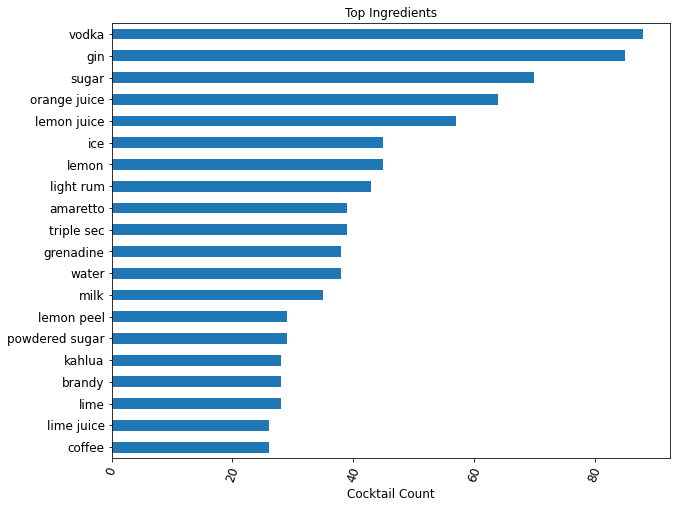

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = top_vals.plot(kind='barh', title ="Top Ingredients", fontsize=12)
ax.set_xlabel("Cocktail Count", fontsize=12)
ax.grid(False)
plt.xticks(rotation=70)
plt.show()